# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 10 : Convolutional Neural Networks
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_10_aa12345.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

5. Each task has points assigned to it. Total Lab is of 100 points.

6. Use of for loops is strictly prohibited.

7. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

8. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


In this lab we will work on CNNs. This Lab is going to be short. Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Let's start with importing Libraries first

In [6]:
import torch
import torch.nn as nn
import torchvision
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# **Convolution for MNIST**

This notebook builds a proper network for 2D convolution.  It works with the MNIST dataset , which was the original classic dataset for classifying images.  The network will take a 28x28 grayscale image and classify it into one of 10 classes representing a digit.



In [7]:
# Run this once to load the train and test data straight into a dataloader class
# that will provide the batches

# (It may complain that some files are missing because the files seem to have been
# reorganized on the underlying website, but it still seems to work). If everything is working
# properly, then the whole notebook should run to the end without further problems
# even before you make changes.
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

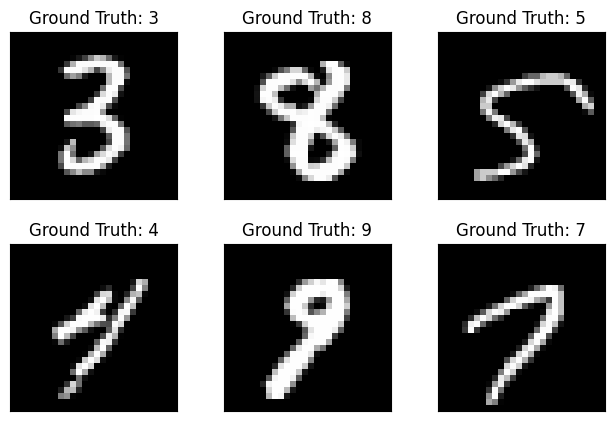

In [8]:
# Let's draw some of the training data
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

Define the network.  This is a more typical way to define a network than the sequential structure.  We define a class for the network, and define the parameters in the constructor.  Then we use a function called forward to actually run the network.  It's easy to see how you might use residual connections in this format.

# Q1: TODO [30 Points]

Build this network architecture by completing the function given below.
1. A valid convolution with kernel size 5, 1 input channel and 10 output channels
2. A max pooling operation over a 2x2 area
3. A Relu
4. A valid convolution with kernel size 5, 10 input channels and 20 output channels
5. A 2D Dropout layer
6. A max pooling operation over a 2x2 area
7. A relu
8. A flattening operation
9. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 50
10. A ReLU
11. A fully connected layer mapping from 50 to 10 dimensions
12. A softmax function.

In [9]:


import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model=nn.Sequential(

            #nn.MaxPool2d( kernel_size=2, stride=2) This code can be used for max pooling. Google it to understand it.
            #nn.Dropout() can be used for dropout
            nn.Conv2d(1, 10, kernel_size=5), # 1. image channel, 10 output channels, 5x5 square convolution kernel
            nn.MaxPool2d(kernel_size=2, stride=2), # 2. max pooling 2x2
            nn.ReLU(), # 3. Relu activation function

            nn.Conv2d(10, 20, kernel_size=5), # 4. 10 input channels, 20 output channels, 5x5 square convolution kernel
            nn.Dropout2d(), # 5. dropout
            nn.MaxPool2d(kernel_size=2, stride=2), # 6. max pooling 2x2
            nn.ReLU(), # 7. Relu activation function

            nn.Flatten(), # 8. flattening operation

            nn.Linear(320, 50), # 9. 320 input features, 50 output features
            nn.ReLU(), # 10. Relu activation function

            nn.Linear(50, 10), # 11. 50 input features, 10 output features
            nn.Softmax(dim=1) # 12. softmax activation function
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [10]:
#Do NOT EDIT
#USE THIS CODE FOR TESTING
#Since we can't compare the model, its better to look at the its printed structure and compare it with layers given in architecture
net = Net()
print(net)

# Test the network with a random input of shape (batch_size, channels, height, width)
x = torch.randn(16, 1, 28, 28)  # Example batch of 16 samples, 1 channel, 28x28 images
output = net(x)
print(output.shape)  # Output should be (16, 10)

assert output.shape == (16, 10), "Output shape does not match expected shape"


Net(
  (model): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (4): Dropout2d(p=0.5, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=320, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=10, bias=True)
    (11): Softmax(dim=1)
  )
)
torch.Size([16, 10])


In [11]:
# Initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_uniform_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)

In [12]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [13]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = model(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [15]:
# Create network
model = Net()
# Initialize model weights
model.apply(weights_init)
# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [16]:
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000]	Loss: -0.101131
Train Epoch: 1 [640/60000]	Loss: -0.099985
Train Epoch: 1 [1280/60000]	Loss: -0.100898
Train Epoch: 1 [1920/60000]	Loss: -0.118542
Train Epoch: 1 [2560/60000]	Loss: -0.114387
Train Epoch: 1 [3200/60000]	Loss: -0.098014
Train Epoch: 1 [3840/60000]	Loss: -0.131624
Train Epoch: 1 [4480/60000]	Loss: -0.111092
Train Epoch: 1 [5120/60000]	Loss: -0.117117
Train Epoch: 1 [5760/60000]	Loss: -0.138078
Train Epoch: 1 [6400/60000]	Loss: -0.148713
Train Epoch: 1 [7040/60000]	Loss: -0.137987
Train Epoch: 1 [7680/60000]	Loss: -0.199400
Train Epoch: 1 [8320/60000]	Loss: -0.129732
Train Epoch: 1 [8960/60000]	Loss: -0.150108
Train Epoch: 1 [9600/60000]	Loss: -0.226297
Train Epoch: 1 [10240/60000]	Loss: -0.204680
Train Epoch: 1 [10880/60000]	Loss: -0.179540
Train Epoch: 1 [11520/60000]	Loss: -0.212509
Train Epoch: 1 [12160/60000]	Loss: -0.241888
Train Epoch: 1 [12800/60000]	Loss: -0.226496
Train Epoch: 1 [13440/60000]	Loss: -0.254100
Train Epoch: 1 [14080/60000]	L

/home/alimuhammad/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: -0.6637, Accuracy: 6684/10000 (67%)

Train Epoch: 2 [0/60000]	Loss: -0.559267
Train Epoch: 2 [640/60000]	Loss: -0.663822
Train Epoch: 2 [1280/60000]	Loss: -0.639676
Train Epoch: 2 [1920/60000]	Loss: -0.654603
Train Epoch: 2 [2560/60000]	Loss: -0.593948
Train Epoch: 2 [3200/60000]	Loss: -0.674888
Train Epoch: 2 [3840/60000]	Loss: -0.616088
Train Epoch: 2 [4480/60000]	Loss: -0.547521
Train Epoch: 2 [5120/60000]	Loss: -0.673225
Train Epoch: 2 [5760/60000]	Loss: -0.546283
Train Epoch: 2 [6400/60000]	Loss: -0.639926
Train Epoch: 2 [7040/60000]	Loss: -0.631537
Train Epoch: 2 [7680/60000]	Loss: -0.606824
Train Epoch: 2 [8320/60000]	Loss: -0.581745
Train Epoch: 2 [8960/60000]	Loss: -0.636393
Train Epoch: 2 [9600/60000]	Loss: -0.555195
Train Epoch: 2 [10240/60000]	Loss: -0.685454
Train Epoch: 2 [10880/60000]	Loss: -0.630742
Train Epoch: 2 [11520/60000]	Loss: -0.646365
Train Epoch: 2 [12160/60000]	Loss: -0.718778
Train Epoch: 2 [12800/60000]	Loss: -0.597505
Train Epoch: 2 [

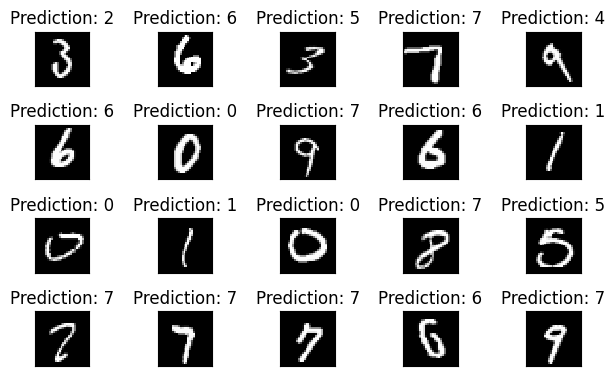

In [17]:
# Run network on data we got before and show predictions
output = model(example_data)

fig = plt.figure()
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Q2: TODO [45 Points]
You implemented the previous given architecture. Now let's implement a modified version of AlexNet on mnist.

if you don't know what alexnet is, don't worry. This lab doesn't require the background of it. Its just an architecture and we are implementing it.

Here is AlexNet Architecture:
1. Convolution with kernel size 5, stride 1, padding 1, 1 input channel and 32 output channels
2. A Relu
3. Convolution with kernel size 3, padding 1, 32 input channels and 64 output channels
4. A Relu
5. A max pooling operation over a 2x2 area, stride 2
6. Convolution with kernel size 3, padding 1, 64 input channels and 96 output channels
7. A Relu
8. Convolution with kernel size 3, padding 1, 96 input channels and 64 output channels
9. A Relu
10. Convolution with kernel size 3, padding 1, 64 input channels and 32 output channels
11. A Relu
12. A max pooling operation over a 2x2 area, stride 1

13. A flattening operation
14. A dropout
15. A fully connected layer mapping from (whatever dimensions we are at-- find out using .shape) to 2048
16. A ReLU
11. A fully connected layer mapping from 2048 to 1024
16. A ReLU
18. A fully connected layer mapping from 1024 to 10

In [14]:
class Net(nn.Module):
    def __init__(self, num=10):
        super(Net, self).__init__()
        self.model=nn.Sequential(

            #nn.MaxPool2d( kernel_size=2, stride=2) This code can be used for max pooling. Google it to understand it.
            #nn.Dropout() can be used for dropout

            #1. Conv Net kernel size 5, stride 1, padding 1, 1 input channel, 32 output channels
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(), # 2. Relu activation function
            #3. Conv with kernel size 3, padding 1, 32 input channels, 64 output channels
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(), # 4. Relu activation function
            #5. Max pooling operation over 2x2 area, stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),
            #6. Conv with kernel size 3, padding 1, 64 input channels, 96 output channels
            nn.Conv2d(64, 96, kernel_size=3, padding=1),
            nn.ReLU(), # 7. Relu activation function
            #8. Conv with kernel size 3, padding 1, 96 input channels, 64 output channels
            nn.Conv2d(96, 64, kernel_size=3, padding=1),
            nn.ReLU(), # 9. Relu activation function
            #10. Conv with kernel size 3, padding 1, 64 input channels and 32 output channels
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(), # 11. Relu activation function
            #12. Max pooling operation over 2x2 area, stride 1
            nn.MaxPool2d(kernel_size=2, stride=1),
            #13. Flatten the output
            nn.Flatten(),
            #14. Dropout
            nn.Dropout(),
            #15. Fully Connected Layer mapping 
            nn.Linear(4608, 2048),
            nn.ReLU(), # 16. Relu activation function
            #17. Fully Connected Layer mapping from 2048 to 1024
            nn.Linear(2048, 1024),
            nn.ReLU(), # 18. Relu activation function
            #19. Fully Connected Layer mapping from 1024 to 10
            nn.Linear(1024, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [15]:
#Do NOT EDIT
#USE THIS CODE FOR TESTING
#Since we can't compare the model, its better to look at the its printed structure and compare it with layers given in architecture
model = Net()
print(model)

model.apply(weights_init)
if torch.cuda.is_available():
    model.cuda()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


Net(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=4608, out_features=2048, bias=True)
    (15): ReLU()
    (16): Linear(in_features=2048, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [16]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader):
    if torch.cuda.is_available():
      data, target = data.cuda(), target.cuda()
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

In [17]:
# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
      if torch.cuda.is_available():
          data, target = data.cuda(), target.cuda()
      data, target = Variable(data, volatile=True), Variable(target)
      output = model(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item()# sum up batch loss
      pred = output.data.max(1, keepdim=True)[1]# get the index of the max log-probability
      correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
  test_loss /= len(test_loader.dataset)
  correct=float(correct.to(torch.device('cpu')).numpy())
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [38]:
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000]	Loss: 2.299699
Train Epoch: 1 [640/60000]	Loss: 2.306395
Train Epoch: 1 [1280/60000]	Loss: 2.302206
Train Epoch: 1 [1920/60000]	Loss: 2.298068
Train Epoch: 1 [2560/60000]	Loss: 2.278997
Train Epoch: 1 [3200/60000]	Loss: 2.247399
Train Epoch: 1 [3840/60000]	Loss: 2.264837
Train Epoch: 1 [4480/60000]	Loss: 2.196402
Train Epoch: 1 [5120/60000]	Loss: 2.112981
Train Epoch: 1 [5760/60000]	Loss: 1.790514
Train Epoch: 1 [6400/60000]	Loss: 1.215119
Train Epoch: 1 [7040/60000]	Loss: 1.169026
Train Epoch: 1 [7680/60000]	Loss: 0.758016
Train Epoch: 1 [8320/60000]	Loss: 0.609010
Train Epoch: 1 [8960/60000]	Loss: 0.449561
Train Epoch: 1 [9600/60000]	Loss: 0.436160
Train Epoch: 1 [10240/60000]	Loss: 0.383146
Train Epoch: 1 [10880/60000]	Loss: 0.564202
Train Epoch: 1 [11520/60000]	Loss: 0.432428
Train Epoch: 1 [12160/60000]	Loss: 0.591433
Train Epoch: 1 [12800/60000]	Loss: 0.586567
Train Epoch: 1 [13440/60000]	Loss: 0.337868
Train Epoch: 1 [14080/60000]	Loss: 0.324821
Train Ep

/tmp/ipykernel_336811/4025279313.py:9: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/home/alimuhammad/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0707, Accuracy: 9765.0/10000 (98%)

Train Epoch: 2 [0/60000]	Loss: 0.080573
Train Epoch: 2 [640/60000]	Loss: 0.329982
Train Epoch: 2 [1280/60000]	Loss: 0.075456
Train Epoch: 2 [1920/60000]	Loss: 0.131028
Train Epoch: 2 [2560/60000]	Loss: 0.027370
Train Epoch: 2 [3200/60000]	Loss: 0.195240
Train Epoch: 2 [3840/60000]	Loss: 0.081495
Train Epoch: 2 [4480/60000]	Loss: 0.140562
Train Epoch: 2 [5120/60000]	Loss: 0.038412
Train Epoch: 2 [5760/60000]	Loss: 0.175197
Train Epoch: 2 [6400/60000]	Loss: 0.038040
Train Epoch: 2 [7040/60000]	Loss: 0.153490
Train Epoch: 2 [7680/60000]	Loss: 0.045921
Train Epoch: 2 [8320/60000]	Loss: 0.042664
Train Epoch: 2 [8960/60000]	Loss: 0.021339
Train Epoch: 2 [9600/60000]	Loss: 0.024144
Train Epoch: 2 [10240/60000]	Loss: 0.011187
Train Epoch: 2 [10880/60000]	Loss: 0.143326
Train Epoch: 2 [11520/60000]	Loss: 0.080839
Train Epoch: 2 [12160/60000]	Loss: 0.079510
Train Epoch: 2 [12800/60000]	Loss: 0.118302
Train Epoch: 2 [13440/60000]	Loss: 0

/tmp/ipykernel_336811/2673449976.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  example_data, example_target = Variable(example_data, volatile=True), Variable(example_target)


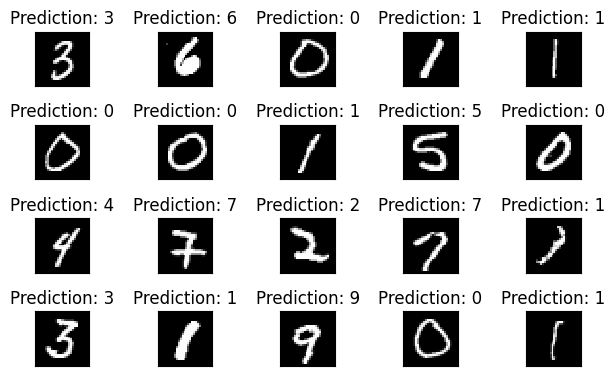

In [39]:
# Run network on data we got before and show predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_target) = next(examples)
if torch.cuda.is_available():
  example_data, example_target = example_data.cuda(), example_target.cuda()
example_data, example_target = Variable(example_data, volatile=True), Variable(example_target)
output = model(example_data)

fig = plt.figure()
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

# Q3: TODO [25 Points]
Try 2 additional techniques
1. Data augmentation for increasing data
2. Number of epochs
3. Batch size in dataloader

implement this under this cell and give your opinion about does data augmentation helps in improving accuracy. WHat effetc does changing epochs have on the training. What effect did changing batch size have.
You can utilize AI Tools for this as well.

In [18]:
class Net(nn.Module):
    def __init__(self, num=10):
        super(Net, self).__init__()
        self.model=nn.Sequential(

            #nn.MaxPool2d( kernel_size=2, stride=2) This code can be used for max pooling. Google it to understand it.
            #nn.Dropout() can be used for dropout

            #1. Conv Net kernel size 5, stride 1, padding 1, 1 input channel, 32 output channels
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=1),
            nn.ReLU(), # 2. Relu activation function
            #3. Conv with kernel size 3, padding 1, 32 input channels, 64 output channels
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(), # 4. Relu activation function
            #5. Max pooling operation over 2x2 area, stride 2
            nn.MaxPool2d(kernel_size=2, stride=2),
            #6. Conv with kernel size 3, padding 1, 64 input channels, 96 output channels
            nn.Conv2d(64, 96, kernel_size=3, padding=1),
            nn.ReLU(), # 7. Relu activation function
            #8. Conv with kernel size 3, padding 1, 96 input channels, 64 output channels
            nn.Conv2d(96, 64, kernel_size=3, padding=1),
            nn.ReLU(), # 9. Relu activation function
            #10. Conv with kernel size 3, padding 1, 64 input channels and 32 output channels
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(), # 11. Relu activation function
            #12. Max pooling operation over 2x2 area, stride 1
            nn.MaxPool2d(kernel_size=2, stride=1),
            #13. Flatten the output
            nn.Flatten(),
            #14. Dropout
            nn.Dropout(),
            #15. Fully Connected Layer mapping 
            nn.Linear(4608, 2048),
            nn.ReLU(), # 16. Relu activation function
            #17. Fully Connected Layer mapping from 2048 to 1024
            nn.Linear(2048, 1024),
            nn.ReLU(), # 18. Relu activation function
            #19. Fully Connected Layer mapping from 1024 to 10
            nn.Linear(1024, 10),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import ConcatDataset, Subset, DataLoader
import torchvision.transforms as transforms
import numpy as np

# Define data augmentation transformations
transform_augmented = transforms.Compose([
    transforms.RandomRotation(10),          # Random rotation by 10 degrees
    transforms.RandomHorizontalFlip(),       # Random horizontal flip
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Original dataset (without augmentation)
original_dataset = torchvision.datasets.MNIST(
    './files/', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

# Subset of the original data to apply transformations
augmented_subset_size = int(0.5 * len(original_dataset))  # Increase size by 50%
indices = np.random.choice(len(original_dataset), augmented_subset_size, replace=False)
augmented_subset = Subset(original_dataset, indices)

# Create an augmented dataset using the subset and transformations
augmented_dataset = torchvision.datasets.MNIST(
    './files/', train=True, download=True, transform=transform_augmented
)
augmented_dataset = Subset(augmented_dataset, indices)

# Combine original and augmented datasets
combined_dataset = ConcatDataset([original_dataset, augmented_dataset])

# DataLoader with the combined dataset
train_loader_augmented = DataLoader(combined_dataset, batch_size=batch_size_train, shuffle=True)

#Do NOT EDIT
#USE THIS CODE FOR TESTING
#Since we can't compare the model, its better to look at the its printed structure and compare it with layers given in architecture
model = Net()
print(model)

model.apply(weights_init)
if torch.cuda.is_available():
    model.cuda()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


Net(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(96, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Dropout(p=0.5, inplace=False)
    (14): Linear(in_features=4608, out_features=2048, bias=True)
    (15): ReLU()
    (16): Linear(in_features=2048, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=10, bias=True)
  )
)


In [26]:
# Main training routine
def train(epoch):
  model.train()
  # Get each
  for batch_idx, (data, target) in enumerate(train_loader_augmented):
    if torch.cuda.is_available():
      data, target = data.cuda(), target.cuda()
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
    # Store results
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader_augmented.dataset), loss.item()))
      

# Run on test data
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
      if torch.cuda.is_available():
          data, target = data.cuda(), target.cuda()
      data, target = Variable(data, volatile=True), Variable(target)
      output = model(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item()# sum up batch loss
      pred = output.data.max(1, keepdim=True)[1]# get the index of the max log-probability
      correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()
  test_loss /= len(test_loader.dataset)
  correct=float(correct.to(torch.device('cpu')).numpy())
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [27]:
# Train for three epochs
n_epochs = 3
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/90000]	Loss: 2.308034
Train Epoch: 1 [640/90000]	Loss: 2.308485
Train Epoch: 1 [1280/90000]	Loss: 2.298017
Train Epoch: 1 [1920/90000]	Loss: 2.295219
Train Epoch: 1 [2560/90000]	Loss: 2.288102
Train Epoch: 1 [3200/90000]	Loss: 2.265552
Train Epoch: 1 [3840/90000]	Loss: 2.259609
Train Epoch: 1 [4480/90000]	Loss: 2.199659
Train Epoch: 1 [5120/90000]	Loss: 2.118025
Train Epoch: 1 [5760/90000]	Loss: 1.947024
Train Epoch: 1 [6400/90000]	Loss: 1.500429
Train Epoch: 1 [7040/90000]	Loss: 1.356968
Train Epoch: 1 [7680/90000]	Loss: 1.195196
Train Epoch: 1 [8320/90000]	Loss: 1.080561
Train Epoch: 1 [8960/90000]	Loss: 0.769689
Train Epoch: 1 [9600/90000]	Loss: 0.888492
Train Epoch: 1 [10240/90000]	Loss: 0.760998
Train Epoch: 1 [10880/90000]	Loss: 0.742269
Train Epoch: 1 [11520/90000]	Loss: 0.641482
Train Epoch: 1 [12160/90000]	Loss: 0.422565
Train Epoch: 1 [12800/90000]	Loss: 0.466517
Train Epoch: 1 [13440/90000]	Loss: 0.546700
Train Epoch: 1 [14080/90000]	Loss: 0.497548
Train Ep

/tmp/ipykernel_362210/4254681509.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/home/alimuhammad/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0734, Accuracy: 9746.0/10000 (97%)

Train Epoch: 2 [0/90000]	Loss: 0.068878
Train Epoch: 2 [640/90000]	Loss: 0.067305
Train Epoch: 2 [1280/90000]	Loss: 0.052763
Train Epoch: 2 [1920/90000]	Loss: 0.117778
Train Epoch: 2 [2560/90000]	Loss: 0.128157
Train Epoch: 2 [3200/90000]	Loss: 0.215850
Train Epoch: 2 [3840/90000]	Loss: 0.094536
Train Epoch: 2 [4480/90000]	Loss: 0.097020
Train Epoch: 2 [5120/90000]	Loss: 0.063844
Train Epoch: 2 [5760/90000]	Loss: 0.078291
Train Epoch: 2 [6400/90000]	Loss: 0.062068
Train Epoch: 2 [7040/90000]	Loss: 0.286543
Train Epoch: 2 [7680/90000]	Loss: 0.267243
Train Epoch: 2 [8320/90000]	Loss: 0.097589
Train Epoch: 2 [8960/90000]	Loss: 0.113585
Train Epoch: 2 [9600/90000]	Loss: 0.136737
Train Epoch: 2 [10240/90000]	Loss: 0.118621
Train Epoch: 2 [10880/90000]	Loss: 0.235140
Train Epoch: 2 [11520/90000]	Loss: 0.209516
Train Epoch: 2 [12160/90000]	Loss: 0.170564
Train Epoch: 2 [12800/90000]	Loss: 0.173359
Train Epoch: 2 [13440/90000]	Loss: 0

/tmp/ipykernel_362210/2673449976.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  example_data, example_target = Variable(example_data, volatile=True), Variable(example_target)


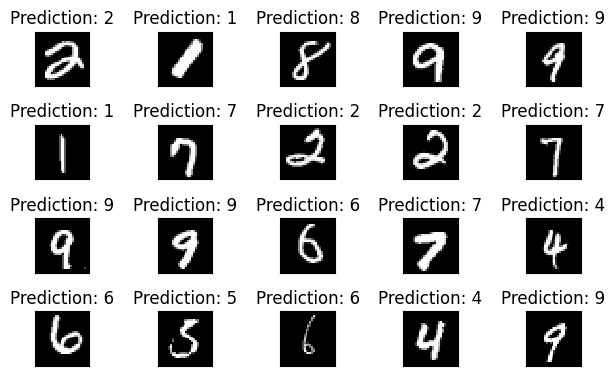

In [28]:
# Run network on data we got before and show predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_target) = next(examples)
if torch.cuda.is_available():
  example_data, example_target = example_data.cuda(), example_target.cuda()
example_data, example_target = Variable(example_data, volatile=True), Variable(example_target)
output = model(example_data)

fig = plt.figure()
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
plt.show()

**Data Augmentation:** This makes the model more robust to variations in the image thus improving generalization.  
**Increased Epochs:** This allows the model to learn more from the data since we increase the training passes, which often helps the model reach higher accuracy, although it may lead to overfitting.  
**Batch Size Change:** Longer batches improve generalization but also increase load on resources such as memory which has slowed down training.